In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator 

# Carga de Datos

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


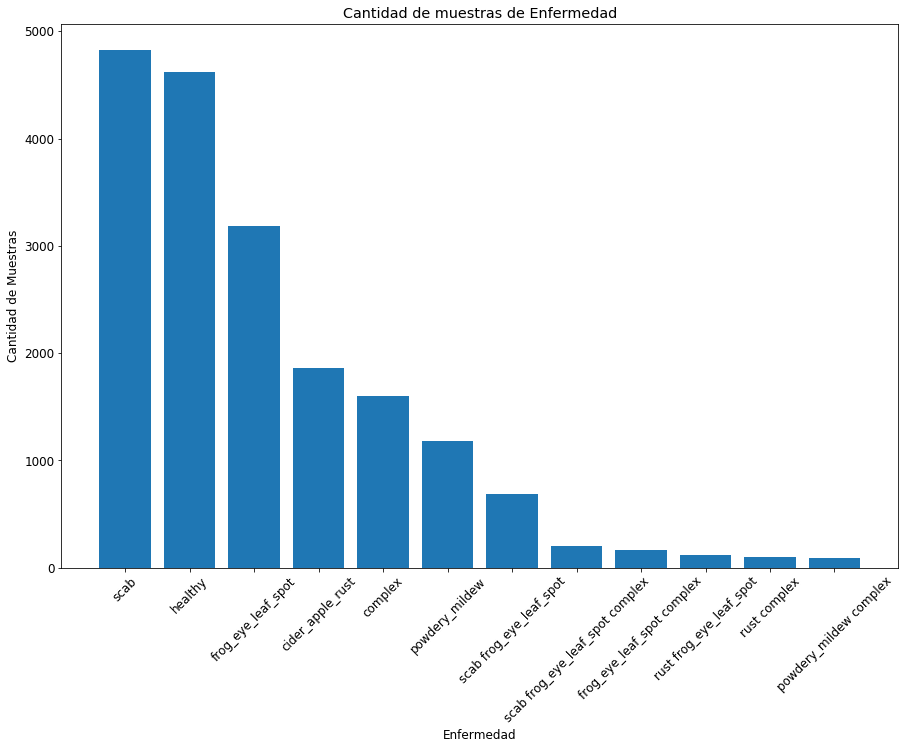

In [4]:
plt.rcParams.update({'font.size': 12}) 
plt.figure(figsize=(15, 10))
plt.bar(df['labels'].value_counts().index,df['labels'].value_counts().values)
plt.xticks(rotation=45)
plt.xlabel('Enfermedad')
plt.ylabel('Cantidad de Muestras')
plt.title('Cantidad de muestras de Enfermedad')
plt.show()

In [5]:
train_data_dir ='train_images'

Num_classes =  len(df['labels'].unique())
Split=0.3
heigth, width=516,516
Batch_size=32
seed=40

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                validation_split = Split)

In [7]:

train_ds = train_datagen.flow_from_dataframe(
    df,
    directory = train_data_dir,
    x_col = "image",
    y_col = "labels",
    target_size = (heigth, width),
    class_mode='categorical',
    batch_size = Batch_size,
    subset = "training",
    seed = seed,
)

val_ds = train_datagen.flow_from_dataframe(
    df,
    directory = train_data_dir,
    x_col = "image",
    y_col = "labels",
    target_size = (heigth, width),
    class_mode='categorical',
    batch_size = Batch_size,
    subset = "validation",
    seed = seed,
)

Found 13043 validated image filenames belonging to 12 classes.
Found 5589 validated image filenames belonging to 12 classes.


C:\Users\frani\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


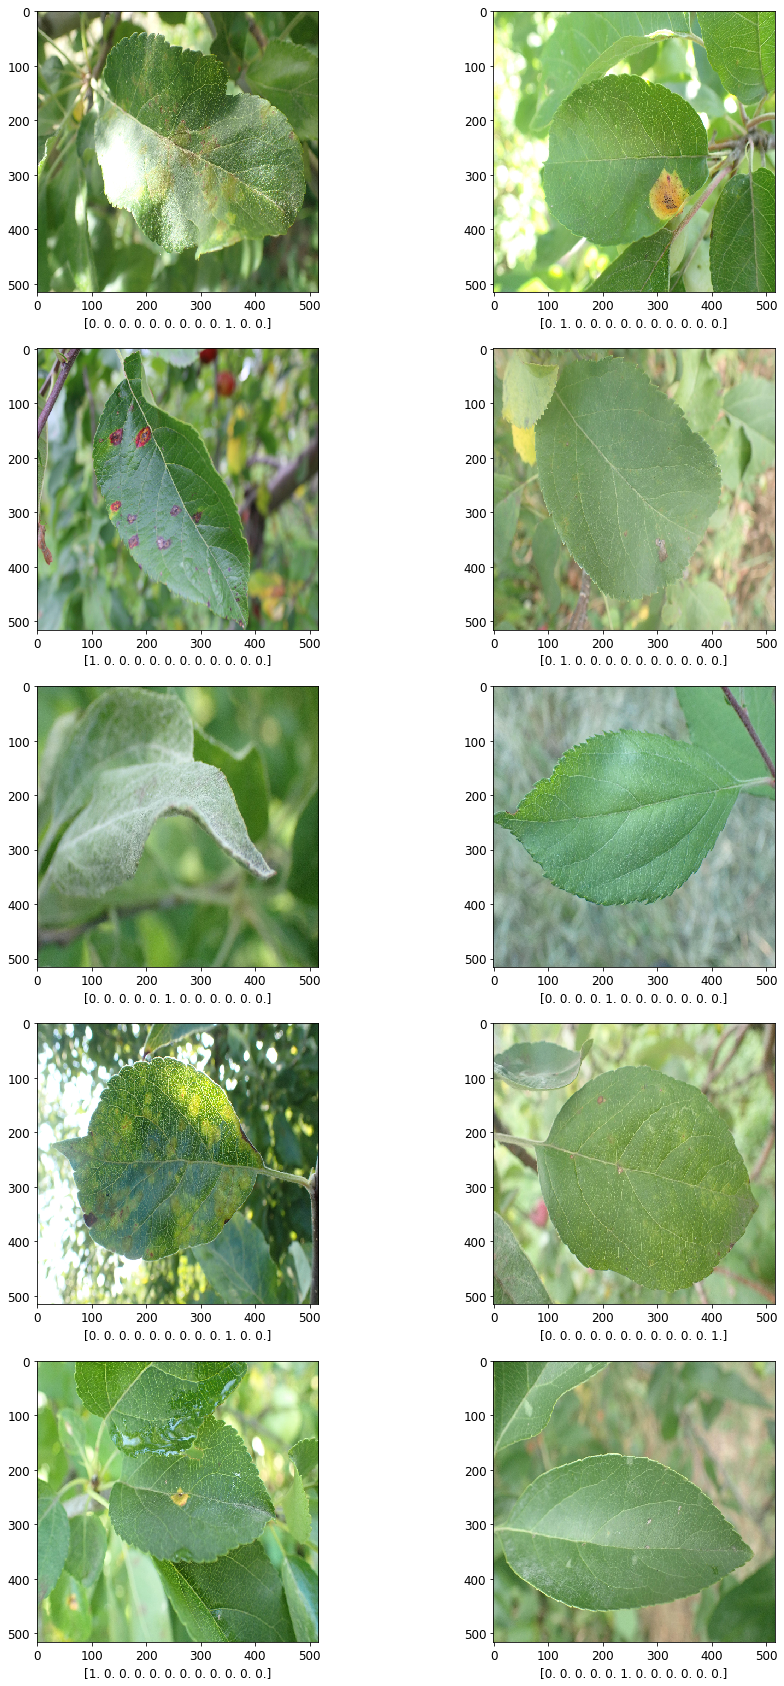

In [8]:
plt.figure(figsize=(15, 30))
images,labels=next(train_ds)
j=0
for i in range(10):
    j=j+1
    plt.subplot(5,2,j)
    plt.imshow(images[i])
    plt.xlabel(labels[i])

In [9]:
train_ds.class_indices

{'cider_apple_rust': 0,
 'complex': 1,
 'frog_eye_leaf_spot': 2,
 'frog_eye_leaf_spot complex': 3,
 'healthy': 4,
 'powdery_mildew': 5,
 'powdery_mildew complex': 6,
 'rust complex': 7,
 'rust frog_eye_leaf_spot': 8,
 'scab': 9,
 'scab frog_eye_leaf_spot': 10,
 'scab frog_eye_leaf_spot complex': 11}